# Redes Neurais Profundas

## Introdução

As redes neurais profundas são redes com várias camadas. Dentre elas, destacam-se

* **Redes Neurais Convolucionais**: são usadas no processamento de imagens, buscando destacar suas características;

* **Redes Neurais Recorrentes**: são puteis em séries temporais e processos que requerem uma sequência em geral, como a fala;

* **Mapas Auto-Organizados**: é um modelo não-supervisionado;

* **Máquinas de Boltzmann**: nele todos os neurônios são conectados, não existe uma camada de saída. É um modelo que gera dados e usado em sistemas de recomendação.

## Dados Iniciais

Como base de dados, vamos usar o MNIST, que é um conjunto de imagens de dígitos (0,1,2,...,9) escritos a mão que foram digitalizados. Cada imagem é um conjunto de 28 x 28 pixels; contudo, quando carregamos os dados, eles se dão por uma tabela com 785 colunas, sendo 784 referentes ao valor rgb de cada pixel (28x28) e a última coluna é a classe, dizendo o dígito daquela imagem. 

Além disso, quando carregamos os dados, a função já retorna registros que servirão de teste e treino, sendo 60 mil exemplos de treino e 10 mil exemplos de teste.

In [1]:
from pylab import imshow, title, plot
from keras.datasets import mnist


(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()

2022-02-09 20:18:47.037420: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-09 20:18:47.037523: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Para vermos como os dados estão dispostos, vejamos uma "imagem".

In [13]:
X_treinamento[21].shape

(28, 28)

Como podemos ver, é um array do tipo 28x28. Assim, o total que temos de teste é um array de dimensões 60000x28x28, que queremos transformar em apenas num array do tipo 60000x784. Para isso, poderíamos simplesmente fazer ```X_treinamento = X_treinamento.reshape(60000,784)```. Contudo, a fim de ficar mais genérico e ser aplicável no conjunto dos testes, fazemos

In [2]:
from numpy import prod

linhas = len(X_treinamento)
colunas = prod(X_treinamento.shape[1:])

X_treinamento = X_treinamento.reshape(linhas, colunas)

Obs: A função ```prod``` do numpy calcula o produto dos elementos de um array. Como ```X_treinamento.shape[1:]``` retorna o array ```(28,28)```, então ```colunas``` é igual a 784, como desejado.

Fazendo o mesmo procedimento com os dados de teste,

In [3]:
X_teste = X_teste.reshape((len(X_teste), prod(X_teste.shape[1:])))

Além disso, precisamos tornar as entradas variáveis do tipo ```float```, pois o que temos são valores inteiros. Por exemplo, a primeira linha está da seguinte maneira.

In [16]:
X_treinamento[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

Para isso, é só usar o método ```astype``` do numpy, que realiza essa mudança na tipagem da variável,

In [4]:
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

Precisamos também normalizar os valores, pois o valor máximo de um pixel é 255.

In [5]:
X_treinamento = X_treinamento / 255
X_teste /= 255

Obs: O operador ```/=``` faz a mesma coisa que a linha de cima, isto é, ele retorna a variável dividida pelo valor que está na direita.

Por fim, devemos transformar as classes em matrizes com 10 colunas, pois temos 10 tipos de resultados diferentes (0,1,2,...,9). Caso tenha dúvida nessa parte, veja o notebook "RedesNeurais.ipynb".

In [6]:
from keras.utils import np_utils

y_treinamento = np_utils.to_categorical(y_treinamento, 10)

y_teste = np_utils.to_categorical(y_teste, 10)

## Criação da Rede e ```Dropout()```

Agora que fizemos o pré-processamento dos dados, vamos construir a rede neural. A novidade é que vamos introduzir uma nova camada, chamada de ```Dropout```, que retira parte dos neurônios para evitar superajuste dos dados. O importamos da mesma maneira que a camada ```Dense```.

In [7]:
from keras.layers import Dense, Dropout

Dentre os argumentos que essa classe possui, vamos destacar apenas o ```rate```, que é uma porcentagem que representa a quantidade de neurônios da camada que serão apagados.

Deste modo, tomando uma quantia de 20% de neurônios a serem excluídos, segue que as nossas camadas serão

In [8]:
taxa = 0.2

camada1 = Dense(units = 64, activation = 'relu', input_dim = 784)
camada2 = Dropout(rate = taxa)

camada3 = Dense(units = 64, activation = 'relu')
camada4 = Dropout(rate = taxa)

camada5 = Dense(units = 64, activation = 'relu')
camada6 = Dropout(rate = taxa)

camada7 = Dense(units = 10, activation = 'softmax')

lista = [camada1, camada2, camada3, camada4, camada5, camada6, camada7]

Obs: colocamos a função softmax na última camada para gerar probabilidades do desenho ser um determinado dígito.

Com isso, criemos a rede propriamente dita.

In [9]:
from keras.models import Sequential

modelo = Sequential(layers = lista)

2022-02-09 20:43:13.360482: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-09 20:43:13.360542: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-09 20:43:13.360589: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ProBook6460b): /proc/driver/nvidia/version does not exist


In [10]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                6

Aqui faremos o treinamento do modelo e armazenaremos o histórico numa variável.

In [12]:
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

historico = modelo.fit(X_treinamento, y_treinamento, epochs = 20,
                       validation_data = (X_teste, y_teste))

2022-02-09 20:45:56.408891: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/20
1863/1875 [============================>.] - ETA: 0s - loss: 0.4541 - accuracy: 0.8599

2022-02-09 20:46:03.078971: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


1875/1875 [==============================] - 7s 3ms/step - loss: 0.4529 - accuracy: 0.8604 - val_loss: 0.1748 - val_accuracy: 0.9442
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2309 - accuracy: 0.9346 - val_loss: 0.1362 - val_accuracy: 0.9591
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1914 - accuracy: 0.9446 - val_loss: 0.1178 - val_accuracy: 0.9655
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1668 - accuracy: 0.9511 - val_loss: 0.1136 - val_accuracy: 0.9669
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1538 - accuracy: 0.9552 - val_loss: 0.1043 - val_accuracy: 0.9687
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1406 - accuracy: 0.9591 - val_loss: 0.1027 - val_accuracy: 0.9704
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1330 - accuracy: 0.9608 - val_loss: 0.0991 - val_accuracy: 0.9712
Epo

Para visualizar a evolução temporal do erro, fazemos o seguinte

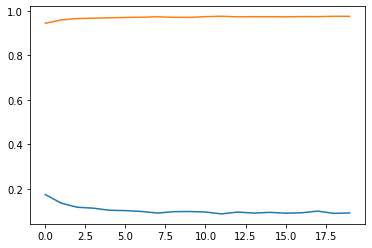

In [13]:
# Gráfico para visualizar os erros e accuracy
historico.history.keys()
#evolução do erro, azul
plot(historico.history['val_loss'])
#performance da rede
plot(historico.history['val_accuracy'])

Para realizarmos uma previsão, embora ela já esteja escondida em ```historico```, digitamos

In [14]:
previsoes = modelo.predict(X_teste)

2022-02-09 20:57:21.482730: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


## Precisão do modelo

Como usual, vejamos agora como calcular a matriz de confusão para o modelo criado. Como a metodologia é a mesma que o notebook "RedesNeurais.ipynb", então vamos colocar o código de uma forma mais enxuta.

In [16]:
from numpy import argmax
from sklearn.metrics import confusion_matrix

y_teste_matriz = [argmax(t) for t in y_teste]
y_previsoes_matriz = [argmax(t) for t in previsoes]
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)
confusao

array([[ 971,    0,    2,    1,    0,    0,    4,    1,    1,    0],
       [   0, 1121,    3,    3,    0,    1,    2,    0,    5,    0],
       [   1,    1, 1010,    3,    3,    2,    1,    6,    5,    0],
       [   0,    0,    5,  993,    0,    6,    0,    4,    2,    0],
       [   0,    0,    4,    0,  956,    0,    9,    1,    1,   11],
       [   2,    0,    0,   22,    1,  855,    5,    1,    2,    4],
       [   5,    2,    1,    1,    6,    3,  936,    0,    4,    0],
       [   2,    5,   10,    9,    0,    0,    0,  999,    1,    2],
       [   2,    0,    3,    8,    6,    3,    2,    5,  941,    4],
       [   2,    4,    0,    9,   10,    3,    1,    7,    2,  971]])

Como podemos ver, o modelo teve uma performance bem alta dado que os termos diagonais da matriz são bem maiores que os demais.